In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:

anime = pd.read_csv("anime.csv")
anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:

anime.dropna(inplace=True)

# Create binary classification target: Popular if members > 100,000
anime['popularity'] = anime['members'].apply(lambda x: 'Popular' if x > 100000 else 'Unpopular')

# Encode genre as a single feature (basic encoding for Decision Tree)
anime['genre_code'] = anime['genre'].astype('category').cat.codes

# Features and target
features = ['genre_code', 'rating']
X = anime[features]
y = anime['popularity']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [6]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9511924570160843
              precision    recall  f1-score   support

     Popular       0.43      0.17      0.25       166
   Unpopular       0.96      0.99      0.97      3440

    accuracy                           0.95      3606
   macro avg       0.69      0.58      0.61      3606
weighted avg       0.94      0.95      0.94      3606



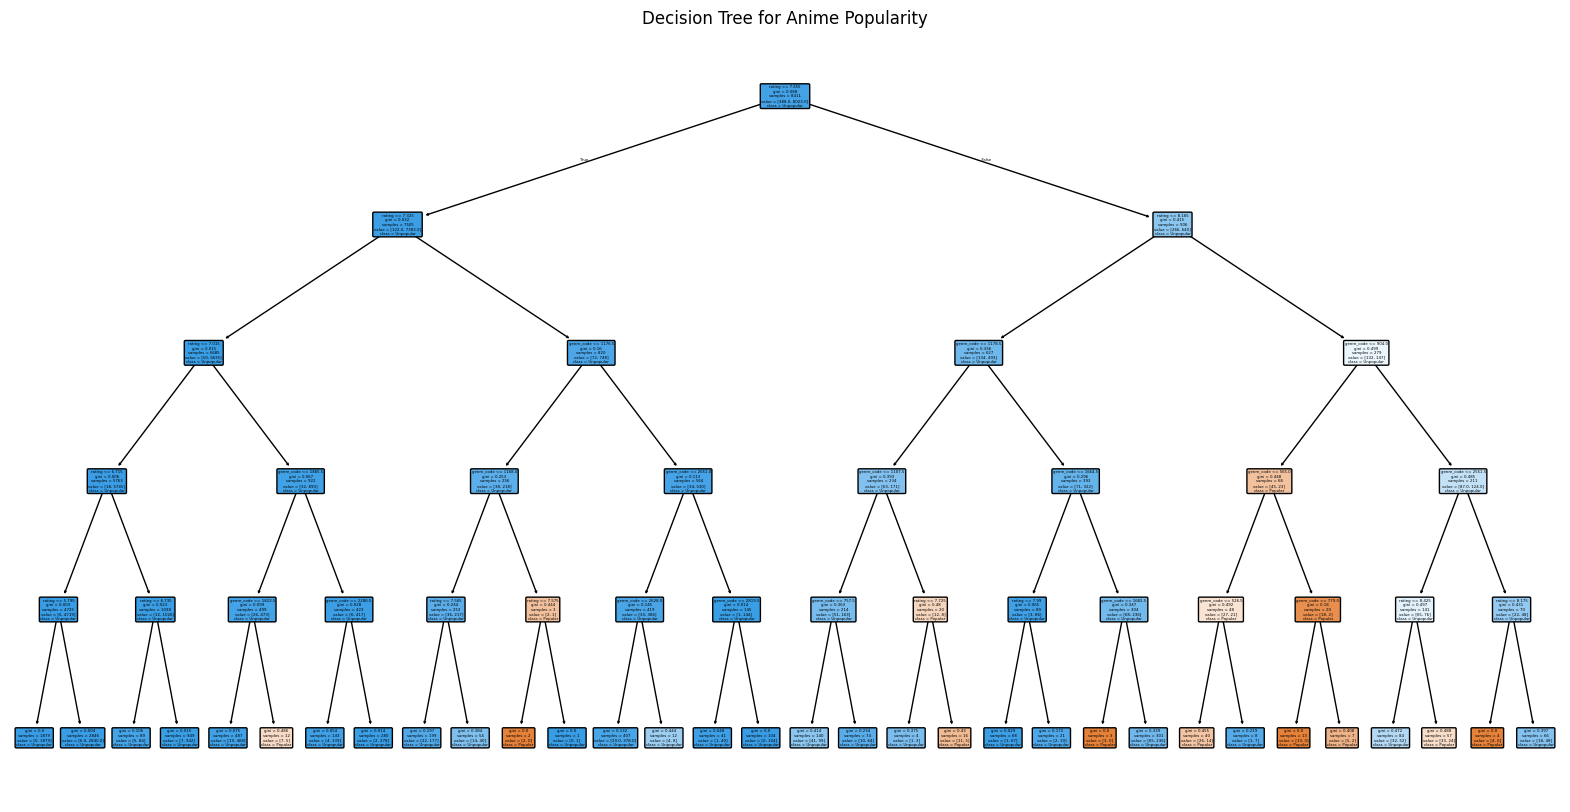

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree for Anime Popularity")
plt.show()


In [24]:
from sklearn.model_selection import GridSearchCV


In [27]:
params = {'max_depth': [3, 5, 7, 10], 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3}
Best Score: 0.9563665613256436
